Overview: This project will discuss the relationship between Natural Gas Price Versus Heating Degree Day(HDD) by creating an accurate model using computer science concepts. This experience is relevant to building models that are utilized to predict real world metrics, such as oil future prices. The student will data gathered online to build a model to predict the two metrics, and perform a metanalysis on how accurate the model is.

In [7]:
#Import statements
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import linregress
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

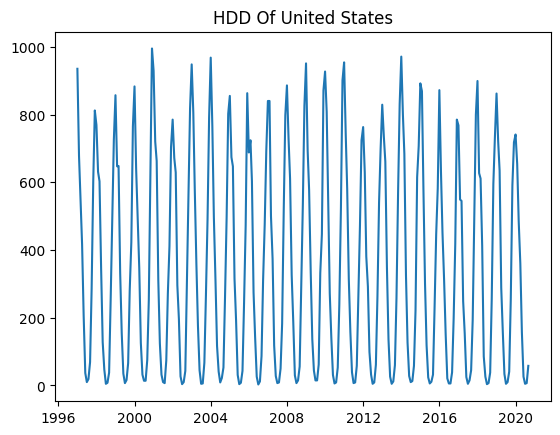

In [8]:
df = pd.read_csv("output.csv")
df['Month'] = pd.to_datetime(df['Month'])
# ticks = plt.xticks()[0]

plt.title('HDD Of United States')
plt.plot(df.Month, df.Data1)

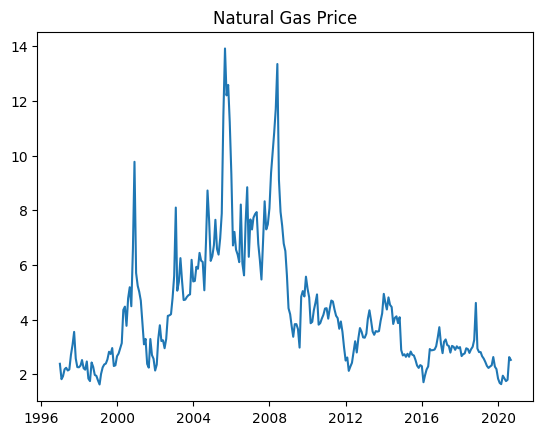

In [9]:
plt.title('Natural Gas Price')
plt.plot(df.Month, df.Data3)

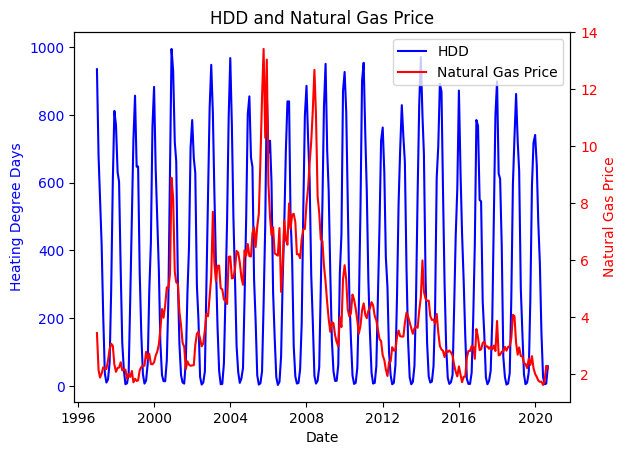

In [10]:
# Plotting the first dataset with its own y-axis
fig, ax1 = plt.subplots()

ax1.plot(df.Month, df.Data1, 'b-', label='HDD')  # 'bo' for blue points dashes for a line
ax1.set_xlabel('Date')
ax1.set_ylabel('Heating Degree Days', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for the second dataset
ax2 = ax1.twinx()  # Shares the same x-axis as ax1

ax2.plot(df.Month, df.Data2, 'r-', label='Natural Gas Price')  # 'ro' for red points
ax2.set_ylabel('Natural Gas Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Displaying legends for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('HDD and Natural Gas Price')
plt.show()

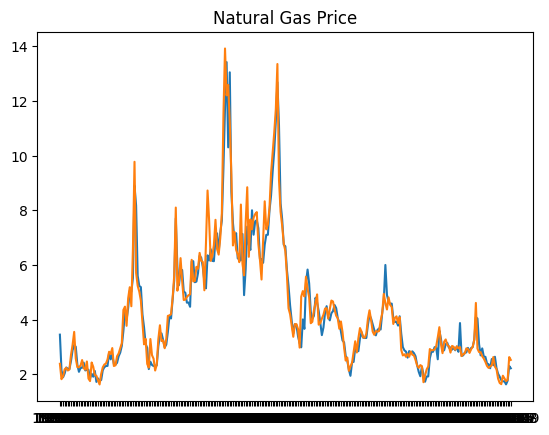

In [16]:
#Regression analysis
df = pd.read_csv("output.csv")
# df['Month'] = pd.to_datetime(df['Month'])
# n = 20  # Display every nth date
# dates_to_show = df['Month'][::n]  # Extract every nth date
# formatter = mdates.DateFormatter('%Y-%m')  # Format for date display (change as needed)

# plt.gca().set_xticks(dates_to_show)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.gcf().autofmt_xdate()  # Rotate and align the dates nicely

plt.title('Natural Gas Price')
plt.plot(df.Month, df.Data2, df.Data3)

In [12]:
slope, intercept, r_value, p_value, std_err = linregress(df.Data1, df.Data2)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.007060356479383214


In [13]:
slope, intercept, r_value, p_value, std_err = linregress(df.Data2, df.Data3)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.9385522612634526


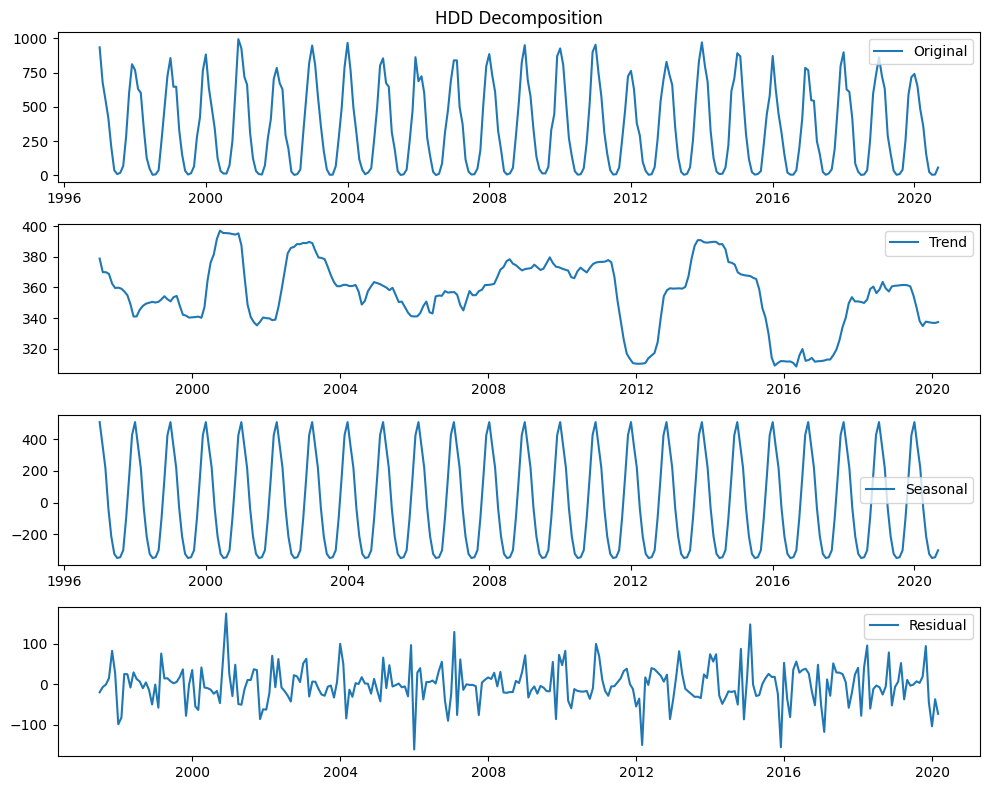

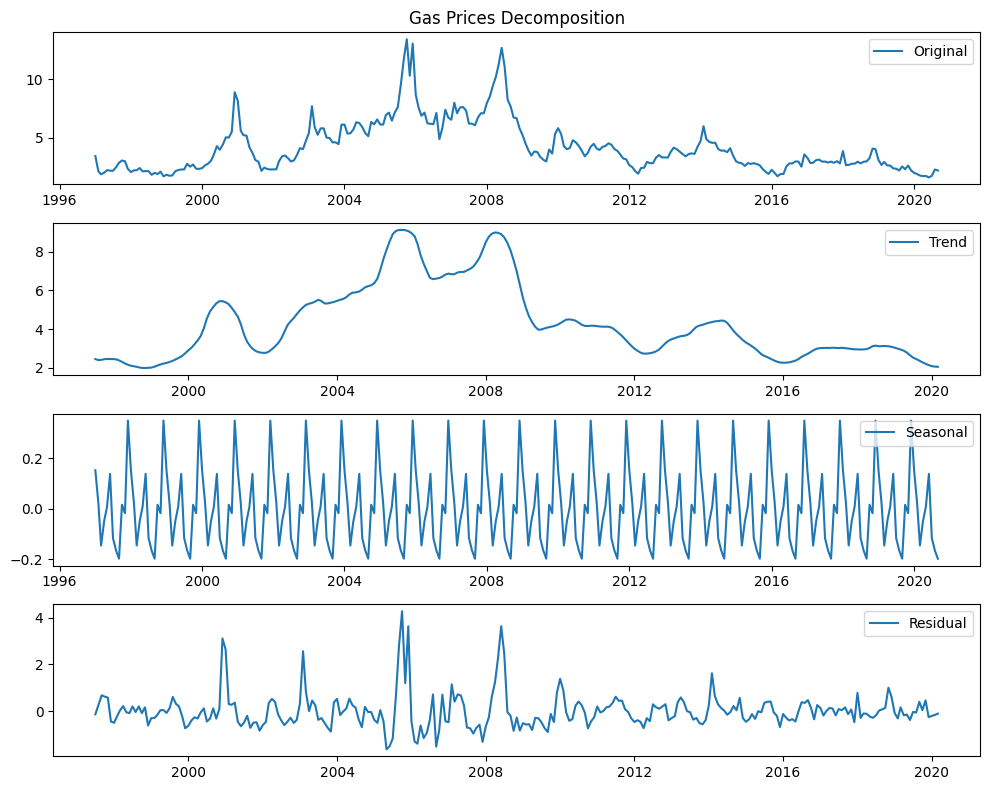

In [14]:
#Seasonal decomposition
df = pd.read_csv("output.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Apply seasonal decomposition to HDD
decomposition_hdd = seasonal_decompose(df['Data1'], model='additive', period=12)  # Adjust the period if needed

# Apply seasonal decomposition to Gas Prices
decomposition_gas = seasonal_decompose(df['Data2'], model='additive', period=12)  # Adjust the period if needed

# Plot the decomposed components for HDD
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('HDD Decomposition')
axes[0].plot(df['Data1'], label='Original')
axes[1].plot(decomposition_hdd.trend, label='Trend')
axes[2].plot(decomposition_hdd.seasonal, label='Seasonal')
axes[3].plot(decomposition_hdd.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

# Plot the decomposed components for Gas Prices
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('Gas Prices Decomposition')
axes[0].plot(df['Data2'], label='Original')
axes[1].plot(decomposition_gas.trend, label='Trend')
axes[2].plot(decomposition_gas.seasonal, label='Seasonal')
axes[3].plot(decomposition_gas.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()


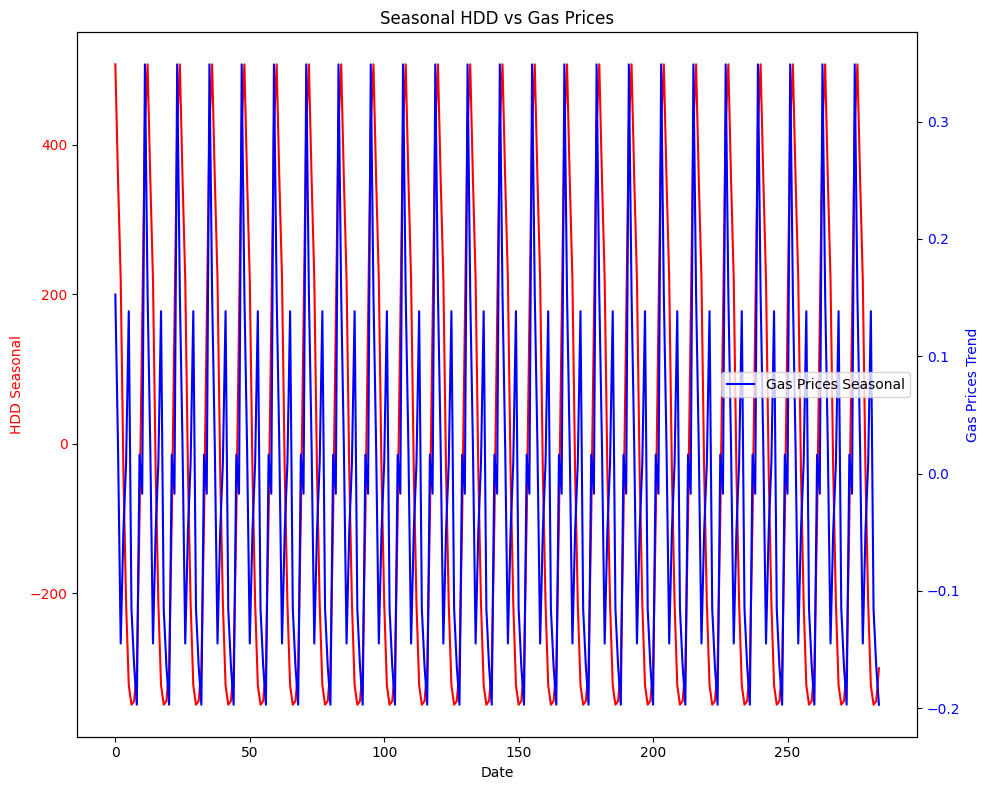

R-squared value between HDD and Gas Prices seaonal Trends 0.3111745576283321


In [18]:
# Create subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 8))

# Shift HDD trend by the specified number of periods (delay)
shifted_hdd_seasonal = decomposition_hdd.seasonal
gas_seasonal = decomposition_gas.seasonal

# Plot HDD Trend on the left y-axis (red)
ax1.plot(df.index, shifted_hdd_seasonal, color='red', label='HDD Seasonal')
ax1.set_xlabel('Date')
ax1.set_ylabel('HDD Seasonal', color='red')
for label in ax1.get_yticklabels():
    label.set_color('red')

# Create a second y-axis for Gas Prices on the right side (blue)
ax2 = ax1.twinx()
ax2.plot(df.index, gas_seasonal, color='blue', label='Gas Prices Seasonal')
ax2.set_ylabel('Gas Prices Trend', color='blue')
for label in ax2.get_yticklabels():
    label.set_color('blue')

plt.title('Seasonal HDD vs Gas Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression between HDD and Gas Prices trend lines
#gas_seasonal = gas_seasonal.iloc[:-1 * delay_periods]
slope, intercept, r_value, p_value, std_err = linregress(shifted_hdd_seasonal.dropna(), gas_seasonal.dropna())
r_squared = r_value ** 2
print(f'R-squared value between HDD and Gas Prices seaonal Trends {r_squared}')

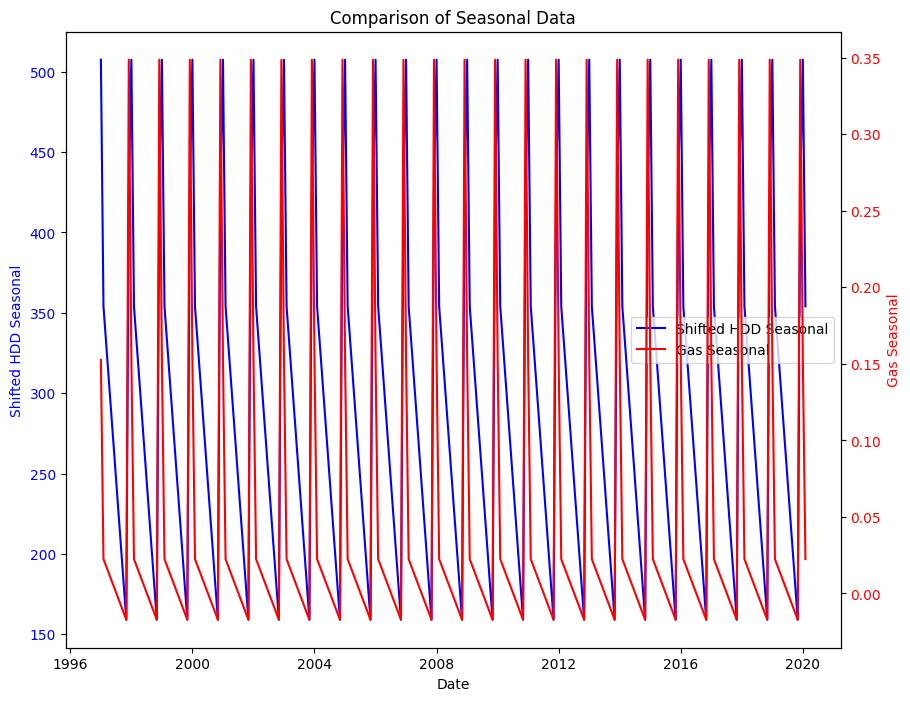

R-squared correlation: 0.41762458184484574


In [32]:
# Shift HDD trend by the specified number of periods (delay)
shifted_hdd_seasonal = shifted_hdd_seasonal[~shifted_hdd_seasonal.index.month.isin([4, 5, 6, 7, 8,9])]
gas_seasonal = gas_seasonal[~gas_seasonal.index.month.isin([4, 5, 6, 7, 8,9])]

fig, ax1 = plt.subplots(figsize=(10, 8))

# Plotting the first dataset on the primary y-axis
ax1.plot(shifted_hdd_seasonal.index, shifted_hdd_seasonal, color='blue', label='Shifted HDD Seasonal')
ax1.set_xlabel('Date')
ax1.set_ylabel('Shifted HDD Seasonal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(gas_seasonal.index, gas_seasonal, color='red', label='Gas Seasonal')
ax2.set_ylabel('Gas Seasonal', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels)

plt.title('Filtered Seasonal Data')
plt.show()


# Calculating R-squared correlation
correlation = linregress(shifted_hdd_seasonal.values, gas_seasonal.values).rvalue ** 2
print(f"R-squared correlation: {correlation}")